# Chapter 3: Classification


## MNIST:
In this example, we're dealing with MNIST Database of characters.

In [71]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
digits = datasets.load_digits()

In [72]:
X,y = digits['data'], digits["target"]
print("X has " + str(X.shape[0]) + " images with " + str(X.shape[1]) + " pixels." )

X has 1797 images with 64 pixels.


X is an array of digit images, y is an array of X values.

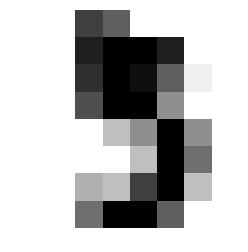

Label for some_digit is 5


In [73]:
def check_digit(X, y, i):
    some_digit = X[i]
    some_digit_image = some_digit.reshape(8, 8)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    plt.show()
    print("Label for some_digit is " + str(y[i]))
    return;

check_digit(X, y, 5)

Now we split our data in training and test sets:

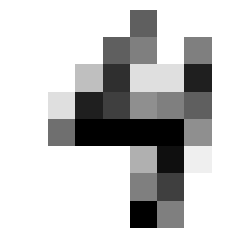

Label for some_digit is 4


In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
check_digit(x_train, y_train, 5)


Let's make a classifier for the digit 5:

In [75]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42, max_iter=1000)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [76]:
sgd_clf.predict([X[5]])

array([False])

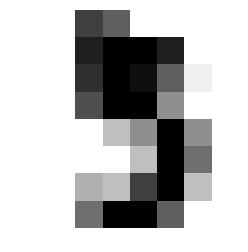

Label for some_digit is 5


In [77]:
check_digit(X, y, 5)

In [78]:
sgd_clf.predict([X[15]])

array([ True])

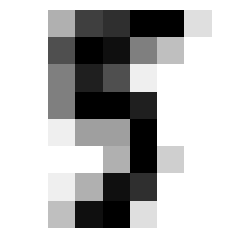

Label for some_digit is 5


In [79]:
check_digit(X, y, 15)

### MEASURING CROSS VALIDATION:

Using StratifiedKfold(...), we split our train and test sets in three subsets each.
<br>Iterating over these three subsets, we can evaluate our model by printing the rate of correct predictions.

In [80]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(x_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = x_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = x_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print( n_correct/ len(y_pred))

0.9895833333333334
0.9874739039665971
0.99581589958159


Alternative way:

In [81]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.98958333, 0.9874739 , 0.9958159 ])

In [82]:
from sklearn.base import BaseEstimator
import numpy as np

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

In [83]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.86847599, 0.91022965, 0.92484342])

## Confusion Matrix:

In [84]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[1291,    4],
       [   9,  133]])

Each row represents an actual class, while each column represents a predicted class.

|True Negative ___________ False Positive|
<br>|False Negative ____________         True Positive |